In [24]:
%load_ext autoreload
%autoreload 2
from modelling_helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load datasets

In [25]:
(X_train, X_test, y_train, y_test), (X_pca_train, X_pca_test, y_pca_train, y_pca_test) = read_combined_dataset()
(X_a3_train, X_a3_test, y_a3_train, y_a3_test), (X_a3_pca_train, X_a3_pca_test, y_a3_pca_train, y_a3_pca_test) = read_a3_dataset()
(X_a4_train, X_a4_test, y_a4_train, y_a4_test), (X_a4_pca_train, X_a4_pca_test, y_a4_pca_train, y_a4_pca_test) = read_a4_dataset()

In [26]:
X_list,X_list_pca, X_list_pruned, y_list = load_each_subject_individually_modelling()

now laoding a3 participants
loaded P21 a3, x shape is (1447, 46), y shape is (1447, 1)
loaded P11 a3, x shape is (1792, 46), y shape is (1792, 1)
loaded P29 a3, x shape is (1514, 46), y shape is (1514, 1)
loaded P8 a3, x shape is (1323, 46), y shape is (1323, 1)
loaded P12 a3, x shape is (1334, 46), y shape is (1334, 1)
loaded P9 a3, x shape is (1560, 46), y shape is (1560, 1)
loaded P28 a3, x shape is (1350, 46), y shape is (1350, 1)
loaded P5 a3, x shape is (3832, 46), y shape is (3832, 1)
loaded P13 a3, x shape is (1514, 46), y shape is (1514, 1)
loaded P15 a3, x shape is (1333, 46), y shape is (1333, 1)
loaded P47 a3, x shape is (1908, 46), y shape is (1908, 1)
loaded P24 a3, x shape is (1515, 46), y shape is (1515, 1)
loaded P20 a3, x shape is (1391, 46), y shape is (1391, 1)
loaded P30 a3, x shape is (1385, 46), y shape is (1385, 1)
loaded P26 a3, x shape is (1445, 46), y shape is (1445, 1)
loaded P3 a3, x shape is (1366, 46), y shape is (1366, 1)
loaded P19 a3, x shape is (1589,

# 0. Dummy classifier

Dummy classifier - always 0  and 50/50

In [27]:
from sklearn.dummy import DummyClassifier

# Always 0
dummy_zero = DummyClassifier(strategy="constant", constant=0)
dummy_zero.fit(X_train, y_train)

# Evaluate the classifier
print("Dummy Classifier (Always 0) Score:", dummy_zero.score(X_test, y_test))
print("Dummy Classifier (Always 0) F1 Score Weighted:", f1_score(y_test, dummy_zero.predict(X_test), average='weighted'))
print("Dummy Classifier (Always 0) F1 Score Macro:", f1_score(y_test, dummy_zero.predict(X_test), average='macro'))


# 50/50
dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_stratified.fit(X_train, y_train)

print("Dummy Classifier (Stratified 50/50) Score:", dummy_stratified.score(X_test, y_test))
print("Dummy Classifier (Stratified 50/50) F1 Score Weighted:", f1_score(y_test, dummy_stratified.predict(X_test), average='weighted'))
print("Dummy Classifier (Stratified 50/50) F1 Score Macro:", f1_score(y_test, dummy_stratified.predict(X_test), average='macro'))


Dummy Classifier (Always 0) Score: 0.8523008214371162
Dummy Classifier (Always 0) F1 Score Weighted: 0.7843398672779179
Dummy Classifier (Always 0) F1 Score Macro: 0.46013088779815725
Dummy Classifier (Stratified 50/50) Score: 0.7440784751575086
Dummy Classifier (Stratified 50/50) F1 Score Weighted: 0.746058678590027
Dummy Classifier (Stratified 50/50) F1 Score Macro: 0.4996488570928511


# Fit Models

## 1. Random Forest Classifier

In [28]:
n_iterations = 1000
param_grid_rf =  {
            'min_samples_split': [2,4,6,8],  # Values from 2 to 10, steps of 2
            'min_samples_leaf': [1,2,3,4,5],  # Values from 1 to 5
            'max_features': ['sqrt', 'log2']  # Options for max_features
        }

#### Both assignments

- Original features

In [29]:
best_model, best_params, clf_report_test = run_random_forest_random_search(X_train, X_test, y_train, y_test,  n_iter=20)

Fitting Random Forest with Randomized Search...


KeyboardInterrupt: 

PCA

In [26]:
best_model, best_params, clf_report_test = run_random_forest_random_search(X_a3_pca_train, X_a3_pca_test, y_a3_pca_train, y_a3_pca_test, n_iter=25)

Fitting Random Forest with Randomized Search...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  19.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  19.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  19.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   6.5s
[CV] END max_depth=30, max_features=sqrt, min_

/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
33 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/base.p

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      6138
           1       0.33      0.00      0.00      1226

    accuracy                           0.83      7364
   macro avg       0.58      0.50      0.46      7364
weighted avg       0.75      0.83      0.76      7364

Test Set Accuracy Score: 0.8333785985877241
Test Set F1 Score Weighted: 0.7580225136845025
Test Set F1 Score Macro: 0.45536585870116286


#### A3 Only

#### A4 Only

PCA

In [ ]:
best_model, best_params, clf_report_test = run_random_forest_random_search(X_a4_pca_train, X_a4_pca_test, y_a4_pca_train, y_a4_pca_test, n_iter=25)

# XGBOOST

In [30]:
param_grid_xg = { 
            'n_estimators': [50, 200],
            'max_depth': [5, 10, 15],
            'min_child_weight': [2,3, 4,5],
            'subsample': [0.75, 0.8]
        }

LOSO Validation with RandomSearch

Complete dataset

In [31]:
best_model, best_params, clf_report = run_xgboost_with_leave_one_subject_out(X_list, y_list, param_grid_xg,use_random_search=True, n_iter=40)

Fitting XGBoost with Leave-One-Subject-Out Cross-Validation...
Fitting 40 folds for each of 40 candidates, totalling 1600 fits


/Users/feyzjan/miniconda3/envs/data_science/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

Best Hyperparameters: {'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 135, 'subsample': 0.7940233919507629}
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     62848
           1       0.54      0.37      0.44     11334

    accuracy                           0.86     74182
   macro avg       0.72      0.66      0.68     74182
weighted avg       0.84      0.86      0.84     74182

Accuracy Score: 0.8565285379202502
F1 Score Macro: 0.6794039416089012

In [34]:
X_train.shape

(50152, 46)

A3 Only

In [ ]:
best_model_a3, best_params_a3, clf_report_a3 = run_xgboost_with_search(X_a3_pca_train, X_a3_pca_test, y_a3_pca_train, y_a3_pca_test, param_grid_xg, n_iter=40)

A4 Only

Both assignments

In [20]:
best_model_random, best_params_random, clf_report_test_random = run_xgboost_with_search(
    X_train, X_test, y_train, y_test, use_random_search=True, n_iter=20)

AAAAA, 0.75 0.8
Fitting XGBoost with Search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=9, min_child_weight=3, n_estimators=152, subsample=0.050000000000000044; total time=   2.0s
[CV] END max_depth=7, min_child_weight=3, n_estimators=121, subsample=0.75; total time=   2.1s
[CV] END max_depth=7, min_child_weight=3, n_estimators=121, subsample=0.75; total time=   2.1s
[CV] END max_depth=9, min_child_weight=3, n_estimators=152, subsample=0.050000000000000044; total time=   2.1s
[CV] END max_depth=7, min_child_weight=3, n_estimators=121, subsample=0.75; total time=   2.1s
[CV] END max_depth=9, min_child_weight=3, n_estimators=152, subsample=0.050000000000000044; total time=   2.1s
[CV] END max_depth=7, min_child_weight=3, n_estimators=124, subsample=0.75; total time=   2.1s
[CV] END max_depth=7, min_child_weight=3, n_estimators=124, subsample=0.75; total time=   2.1s
[CV] END max_depth=8, min_child_weight=3, n_estimators=142, subsample=0.75; total ti

#### XGBoost Feature Importances

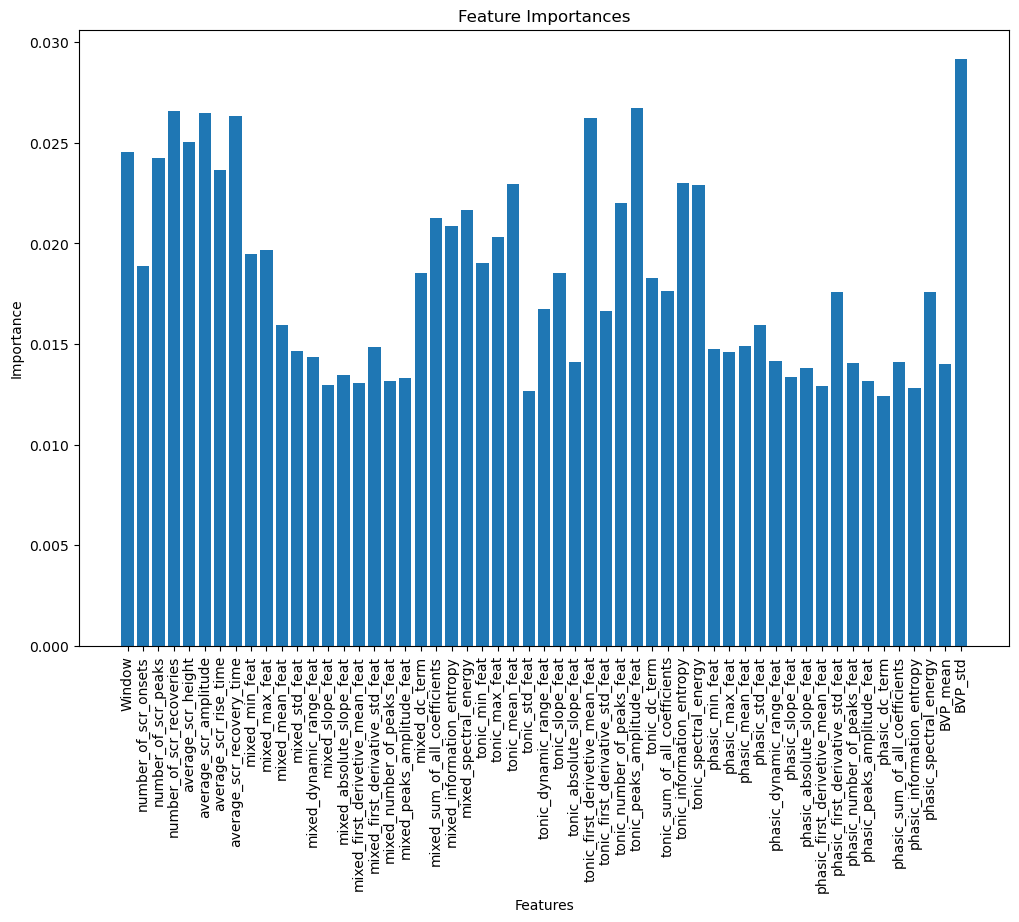